<a href="https://colab.research.google.com/github/ludwigwittgenstein2/Research/blob/master/Semantic_Search_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semantic Search with BERT 
  by Rick Rejeleene

```
`# This is formatted as code`

Objective: Apply Query: "I like Fruits." 
            and rank results with probabilities

```
#0. Can we apply BERT to this problem? 
  To find Similarity between two sentences,
  We can feed each unique pair through BERT, 
  and compare it to all scores. It would take for 10 sentences, 49 passes through BERT, which a GPU would take 60+ hours.

  So, instead we pre compute representation for each sequence in our dataset.

# 1. What is Sentence Embedding? 

Text Embeddings are vector representation of words. 

Sentence Embedding are vector representation of sentences. 


#2.What is Semantic Search?
Semantic Search is search with meaning, in contrast with lexical search. 

In lexical search, our search matches literal query or variants of it. 

Semantic Search on the other hand, searches with context

Eg: "I like apples." from corupus of 10 sentences would bring up most probable matches and rank sentences. 

#3.How do we use Semantic Search with BERT? 

We use SBERT. 

In SBERT, we process two sentences at the same time using Siamese Network

Siamese Network, in simple terms, is a neural network that specializes in measuring similarity, widely used in Facial Recognition systems. 

We have BERT as the base of this model, and we add Pooling Layer to represent input sentences of various length. 

Softmax gives us probability of each class

#4. How does this work? Give me the Architecture of this

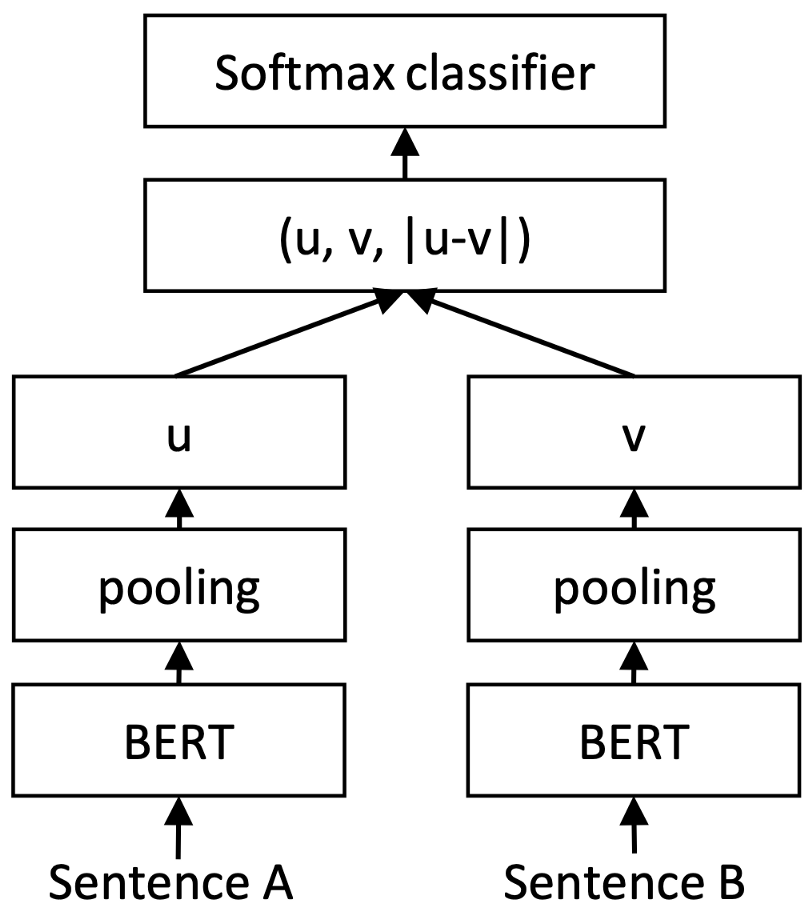

1. Sentence BERT uses Pooling to Token Embedding generated by BERT



#Source: 
Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks






In [ ]:
!pip install sentence-transformers

     |████████████████████████████████| 71kB 3.3MB/s 
     |████████████████████████████████| 1.1MB 3.6MB/s 
     |████████████████████████████████| 3.0MB 13.6MB/s 
     |████████████████████████████████| 890kB 35.5MB/s 
     |████████████████████████████████| 1.1MB 43.9MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.3.8-cp36-none-any.whl size=101996 sha256=c27123a5a8e5da49cb8486eff9465dfb91517348a033d2214547bdcd6d026e51
  Stored in directory: /root/.cache/pip/wheels/27/ec/b3/d12cc8e4daf77846db6543033d3a5642f204c0320b15945647
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=1c804ba3653839d9a6ea62aa3c2d5dd5deed711a7497612165daa94cca4bb557
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses


In [ ]:
#https://pypi.org/project/sentence-transformers/



In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('bert-base-nli-mean-tokens')

sentences = ['Who won the election?', 'Lack of correct news source', 'How do we figure out who won the election?', 'Did everyone win in the election?']

sentence_embeddings = model.encode(sentences)

print('SAMPLE BERT embedding Vector-length', len(sentence_embeddings[0]))

print('Sample BERT embedding vector - note includes negative values', sentence_embeddings[0])


SAMPLE BERT embedding Vector-length 768
Sample BERT embedding vector - note includes negative values [-5.06621242e-01 -4.14385647e-01  6.80156589e-01  1.10902905e+00
  1.38112828e-01  7.03566074e-01 -3.20728481e-01  4.63718623e-01
 -5.77143252e-01  4.42124158e-01  6.48557961e-01  1.66368354e-02
  8.72302830e-01 -1.19855806e-01 -4.56467196e-02  2.80204505e-01
 -3.70686293e-01 -2.12453958e-02  4.91884083e-01 -4.65284914e-01
  1.25715330e-01  7.16980517e-01 -9.05266821e-01 -1.36717096e-01
  2.06467032e-01  4.85025644e-01  3.01887784e-02 -1.98085093e+00
 -9.38615978e-01 -2.74710894e-01 -5.94572604e-01  1.81638345e-01
 -5.83316207e-01 -2.96293199e-01 -7.51849592e-01  3.89402539e-01
  9.63532150e-01 -4.41591322e-01 -3.46491158e-01  3.63579452e-01
 -2.16554686e-01 -7.27016091e-01  1.25904596e+00  7.77477622e-01
 -8.05147648e-01 -5.38869560e-01 -6.91540062e-01  9.94445324e-01
  5.82817435e-01 -1.14126527e+00 -8.17383647e-01 -1.21538436e+00
  8.52550268e-02  1.29542649e+00 -3.38971704e-01  5.49

In [ ]:
#Semantic Search 

import scipy

query = 'Election, Who won?'

queries = [query]
query_embeddings = model.encode(queries)

number_top_matches = 3
print("Semantic Search Results")

for query, query_embedding in zip(queries, query_embeddings):
  distances = scipy.spatial.distance.cdist([query_embedding], sentence_embeddings, "cosine")[0]
  results = zip(range(len(distances)), distances)
  results = sorted(results, key=lambda x:x[1])

  print("\n\n=======\n\n")
  print("Query:", query)
  print("\nTop 5 Simiarlity in Corupus")

  for idx, distance in results[0:number_top_matches]:
    print(sentences[idx].strip(), "(Cosine Score:%.4f)"%(1-distance))

Semantic Search Results




Query: Election, Who won?

Top 5 Simiarlity in Corupus
Who won the election? (Cosine Score:0.9581)
How do we figure out who won the election? (Cosine Score:0.8196)
Did everyone win in the election? (Cosine Score:0.7989)
